# Analyse COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetching calculated data

In [2]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [3]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
870.0,Belgium,2020-01-22,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-44.0,-56.0
871.0,Belgium,2020-01-23,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-43.0,-55.0
872.0,Belgium,2020-01-24,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-42.0,-54.0
873.0,Belgium,2020-01-25,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-41.0,-53.0
874.0,Belgium,2020-01-26,0.0,0.0,11589.616,382.748217,30280.0,0.000000,0.000000,2020-03-06,2020-03-18,-40.0,-52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698.0,United Kingdom,2020-03-18,2642.0,72.0,67886.004,280.601844,241930.0,3.891818,0.106060,2020-03-10,2020-03-14,8.0,4.0
8699.0,United Kingdom,2020-03-19,2716.0,138.0,67886.004,280.601844,241930.0,4.000825,0.203282,2020-03-10,2020-03-14,9.0,5.0
NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN
NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,NaN,NaN


## Filtering the countries

In [45]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Netherlands']

In [56]:
colors = ['#fc0703','g','#03fcf4','#0318fc','m','#03fc80','k','#ff00ff', '#fc5a03']

# Dynamics

In [57]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [58]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [59]:
df_dynamics_plot = df_dynamics_t.loc[range(-20,50),filtered_countries]

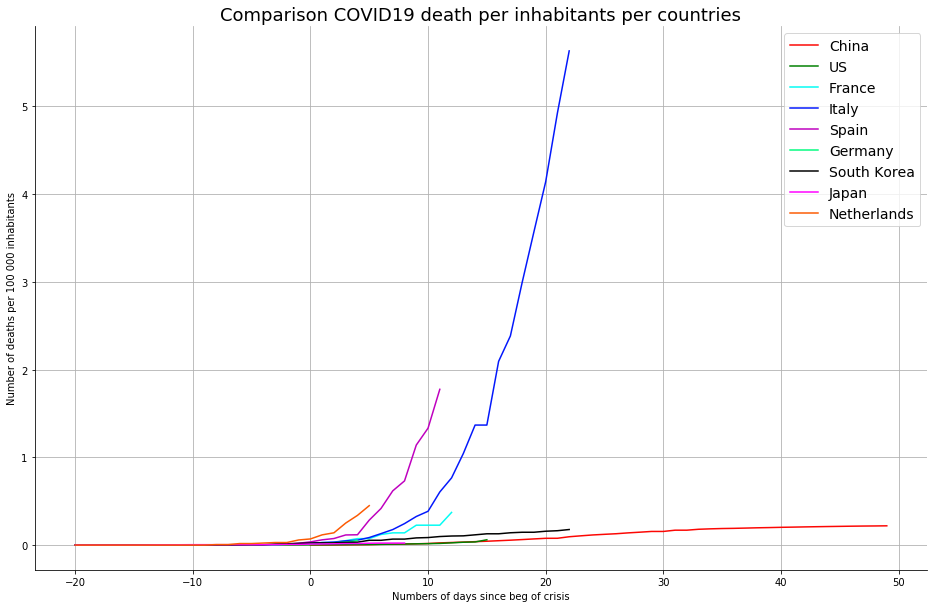

In [60]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [35]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [36]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-20,50),filtered_countries]

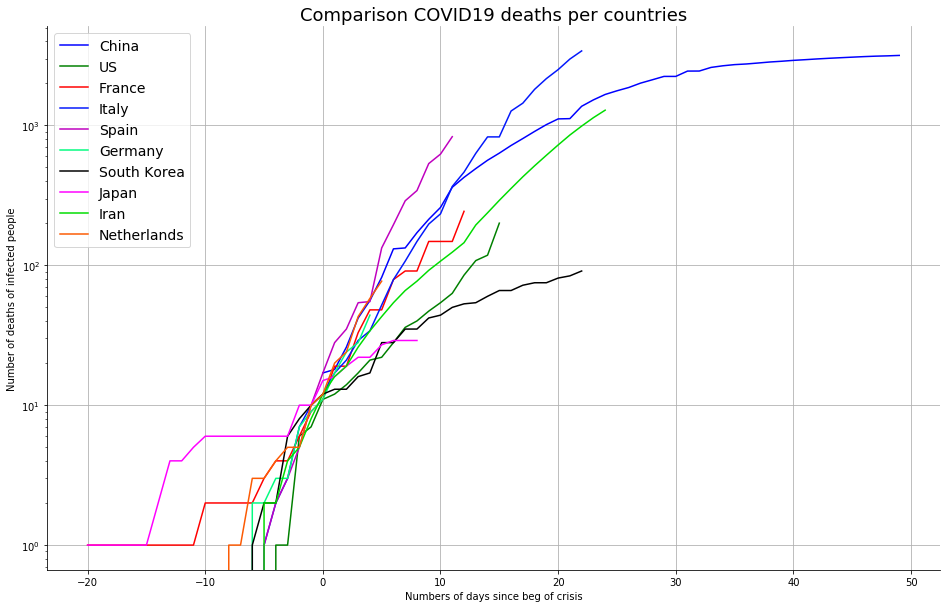

In [37]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

## Cases

In [38]:
df_dynamics_cases = df_dataset[['country','ratio','age']].pivot(index='age',columns='country',values='ratio')

In [39]:
df_dynamics_cases_plot = df_dynamics_cases.loc[range(-20,40),filtered_countries]

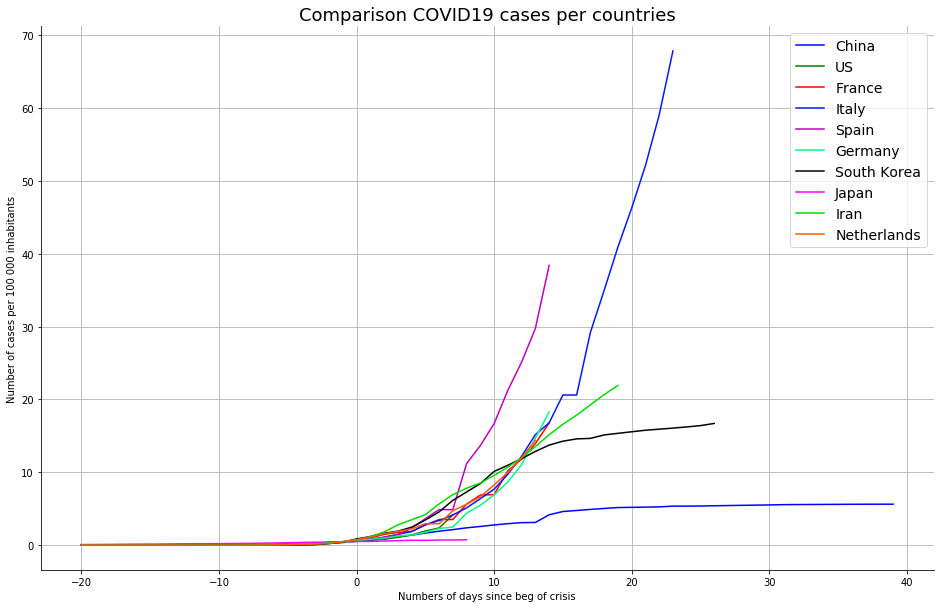

In [40]:
ax_cases=df_dynamics_cases_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 cases per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases.spines['top'].set_visible(False)
ax_cases.spines['right'].set_visible(False)
plt.savefig("cases.png")
plt.show() 

## Death rate
Should be stable

In [41]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [42]:
df_death_rate_pivot = df_dataset[['country','age_death', 'DR']].pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

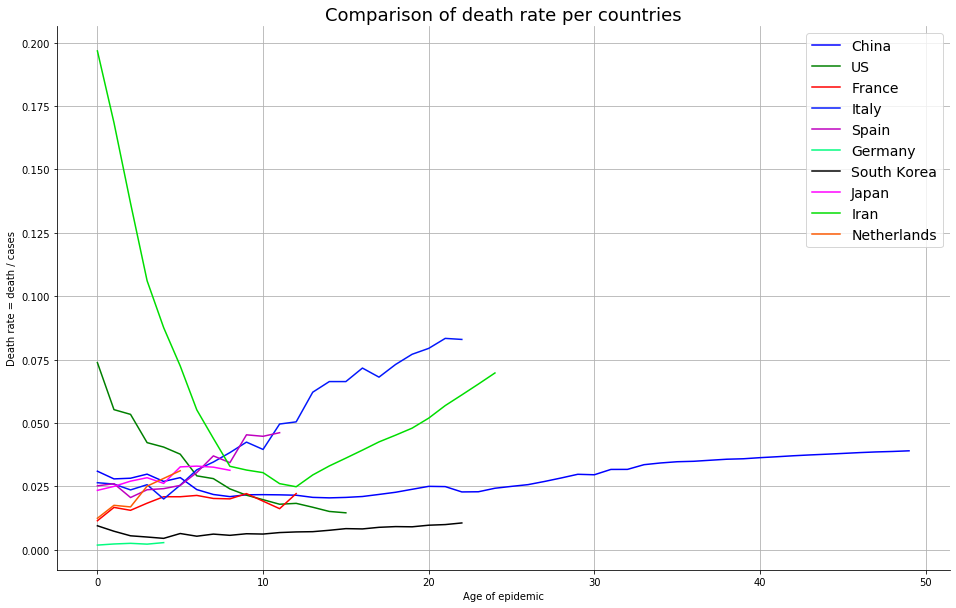

In [43]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate per countries", fontsize=18)
plt.xlabel("Age of epidemic")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 